In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
import re
warnings.filterwarnings('ignore')
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cl_df = pd.read_csv('harmful_2_learning60000.csv')
cl_df.head(3)

,url_id,url,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,top_word
0,5,madteenies.com,2,10,3,42.0,7.0,0.750,big password free login mad madthumb porn porn...
1,15,porntube.com,1,10,4,47.0,7.0,0.750,big anal blond fuck babe pussi ass hard hot in...
2,51,mydickdorms.com,1,3,7,173.0,12.0,0.575,bareback author dude first last licens mg mode...


In [3]:
cl_df['top_word'] = cl_df['top_word'].fillna(" ")
cl_df['top_word'] = cl_df['top_word'].apply(lambda x : re.sub("[^a-zA-Z]"," ", x))

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
import nltk
import string
from nltk.stem.snowball import SnowballStemmer
stopwords = nltk.corpus.stopwords.words('english') # '은,는,이,가' 이런거 없애주는 사전
stemmer = SnowballStemmer("english")  # 부사,형용사 이런걸 어근으로 바꿔줌

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer(stop_words=stopwords, max_features=10000, min_df=0.01, #ngram_range=(1,2), 
                                tokenizer=tokenize_only)

count_matrix = count_vectorizer.fit_transform(cl_df['top_word'])
plt.savefig('ward_clusters2.png', dpi=200) #save figure as ward_clusters

In [15]:
terms = count_vectorizer.get_feature_names()
print(terms)

['access', 'account', 'action', 'activ', 'ad', 'add', 'address', 'adult', 'advertis', 'age', 'agenc', 'ago', 'agre', 'ai', 'al', 'also', 'amateur', 'anal', 'ani', 'anim', 'app', 'applic', 'april', 'archiv', 'area', 'art', 'articl', 'asian', 'ass', 'auf', 'august', 'author', 'avail', 'award', 'b', 'babe', 'back', 'bbw', 'bdsm', 'beauti', 'best', 'bet', 'big', 'black', 'blog', 'blond', 'bodi', 'boob', 'book', 'boy', 'brand', 'browser', 'build', 'busi', 'busti', 'buy', 'c', 'call', 'cam', 'car', 'career', 'casino', 'categori', 'center', 'chang', 'chat', 'check', 'citi', 'click', 'client', 'clip', 'club', 'cock', 'code', 'collect', 'com', 'come', 'comic', 'comment', 'communiti', 'compani', 'condit', 'connect', 'contact', 'content', 'continu', 'cooki', 'copyright', 'creat', 'cum', 'custom', 'das', 'data', 'date', 'day', 'de', 'decemb', 'den', 'der', 'des', 'design', 'detail', 'deutsch', 'develop', 'dick', 'die', 'digit', 'directori', 'display', 'domain', 'download', 'du', 'e', 'educ', 'een'

In [23]:
from sklearn.cluster import KMeans
K = range(1,13)
distortions = []
for k in K:
    kmeansModel = KMeans(n_clusters=k).fit(count_matrix)
    distortions.append(kmeansModel.inertia_)
    print("iteration : %s"%k)

iteration : 1
iteration : 2
iteration : 3
iteration : 4
iteration : 5
iteration : 6
iteration : 7
iteration : 8
iteration : 9
iteration : 10
iteration : 11
iteration : 12


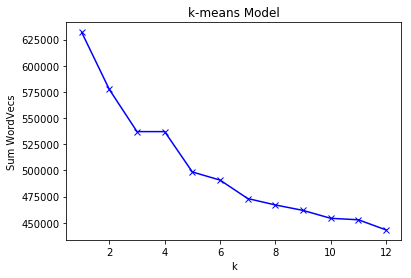

In [34]:
import matplotlib.pyplot as plt
plt.plot(K, distortions,'-bx')
plt.xlabel('k')
plt.ylabel('Sum WordVecs')
plt.title('k-means Model')
plt.savefig('elbow3.png', dpi=200) #save figure as ward_clusters

In [28]:
from sklearn.cluster import KMeans

# 8개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=7, max_iter=10000, random_state=0)
km_cluster.fit(count_matrix)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [29]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (7, 348)
[[  1.72877449e-03   8.83595851e-03   2.68920476e-03 ...,   1.15251633e-03
    3.84172109e-04   1.11409912e-01]
 [  6.20307623e-02   3.98166634e-02   1.64215617e-02 ...,   4.94896381e-02
    5.08955937e-03   6.18620476e-04]
 [  1.36518771e-02   2.37201365e-01   1.19453925e-02 ...,   3.41296928e-03
    1.70648464e-02   5.11945392e-03]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  3.20102433e-03   7.68245839e-03   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   6.40204866e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    1.00000000e+00   0.00000000e+00]]


In [30]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=20):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['url']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['url'] = filenames
        
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('url :',cluster_detail['url'][:20])
        print('==================================================')


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
cl_df['cluster_label'] = cluster_label
feature_names = count_vectorizer.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=cl_df,\
                                   feature_names=feature_names, clusters_num=7, top_n_features=20 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['de', 'en', 'die', 'een', 'und', 'van', 'het', 'op', 'du', 'la', 'der', 'r', 'met', 'je', 'voor', 'mit', 'f', 'ein', 'et', 'te']
url : ['porno6porno.com', 'escortamsterdam.net', 'zangerandre.nl', 'over-blog.com', 'feyenoordheadlines.nl', 'ajaxheadlines.nl', 'zeitungheute.org', 'overblog.com', 'nachrichtheute.com', 'andrevanamstel.nl', 'zeitungenheute.com', 'camchatix.com', 'zeitungheute.net', 'giganieuws.nl', 'hollandislive.nl', 'formule1.ws', 'zeitungheute.com', 'nieuwsdump.be', 'over-blog.fr', 'dvduncuts.com']
####### Cluster 1
Top features: ['us', 'new', 'contact', 'site', 'servic', 'use', 'free', 'get', 'com', 'read', 'news', 'home', 'ani', 'busi', 'view', 'event', 'websit', 'best', 'adult', 'access']
url : ['mydickdorms.com', 'videonsex.com', 'live-sex-free.net', 'handjobmovies.net', 'xadultbook.com', 'sensualadviser.com', 'moviesx.com', 'swingerclubbing.com', 'fuckonwebcams.com', 'manueluncut.com', 'cowlist.com', 'gay-cruise.net', 'moneyshotpills.